In [6]:
import pickle
import os
import os
import pickle
import numpy as np

def data_for_downstream():
    path = os.getcwd() + '/Embedding_results/model_2_embeds/'
    concat = []
    for pkl in os.listdir(path):
        if(".pkl" in pkl):
            file_path = path + pkl
            with open(file_path, 'rb') as file:
                y = pickle.load(file)
                concat += y
    data_y = []
    data_X = []
    for i in range(len(concat)):
        data_X.append(concat[i]['x'][0])
        data_y.append(int(concat[i]['label']))
    data_X = np.array(data_X)
    return data_X, data_y

In [7]:
data_X, data_y = data_for_downstream()

In [8]:
from sklearn.manifold import TSNE
X = data_X
X_embedded = TSNE(n_components = 2, learning_rate = 'auto', perplexity = 3).fit_transform(X)

/home/weinilin/pytorch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


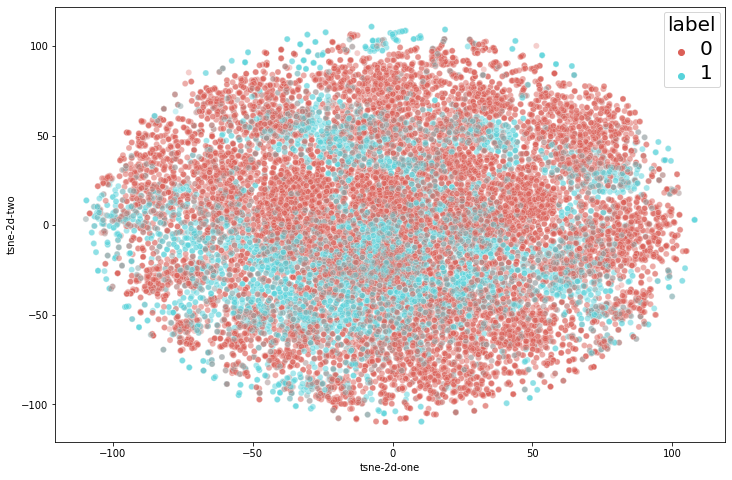

In [12]:

import pandas as pd
df = pd.DataFrame({'tsne-2d-one':X_embedded[:,0], 'tsne-2d-two':X_embedded[:,1], 'label':data_y})
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
plot = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='label',
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3
)
# for legend text

plt.setp(plot.get_legend().get_texts(), fontsize='20') 
 
# for legend title
plt.setp(plot.get_legend().get_title(), fontsize='20') 
plt.show()

In [ ]:

plt.savefig('saving-a-high-resolution-seaborn-plot.png', dpi=300)